# Studying the impact of multicollinearity in linear regression models

**Author: Adrieli Dal'Toé**

In this notebook the problem of multicollinearity will be explored. Multicollinearity appears when independent features in a regression model are associated with one another. This relationship turns difficult to evaluate the features that are most important and makes the parameters of the model not statistical reliable. The main assumption to the interpretability of the parameters in a linear regression model is that the predictors are linearly independent. The parameters weigths the mean change in Y resulting from 1 unit change in a specific X when all the other predictors remain unchanged. If the predictors are associated, then this condition is no longer valid. 

Multicollinearity impacts the statistics of the predictors that are correlated and difficults the interpretability of the model. 

In [39]:
# Data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Linear Regression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [3]:
# Importing the data
from sklearn.datasets import load_boston
df = load_boston()
data = pd.DataFrame(data = df.data, columns = df.feature_names)
data['target'] = df.target

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
data.shape

(506, 14)

In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# No missing values
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

#### Splitting the data

In [15]:
X = data.drop(columns='target')
y = data['target']

# Scaling the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=data.columns[:-1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression: Model 1 

Let's train a base linear regression model using all the features available. Statsmodels library will be used because it provides a complete statistical summary of the model.

In [16]:
X_train_c = sm.add_constant(X_train)
X_test_c = sm.add_constant(X_test)
model = sm.OLS(endog= y_train, exog= X_train_c)
model1 = model.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     90.43
Date:                Tue, 04 May 2021   Prob (F-statistic):          6.21e-109
Time:                        09:45:19   Log-Likelihood:                -1194.3
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     390   BIC:                             2473.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4853      0.236     95.096      0.000      22.020      22.950
CRIM          -0.9715      0.299     -3.250      0.001      -1.559      -0.384
ZN             0.7016      0.373      1.882      0.061      -0.031       1.434
INDUS          0.2768      0.462      0.599      0.549      -0.631       1.184
CHAS           0.7065      0.242      2.914      0.004       0.230       1.183
NOX           -1.9914      0.490     -4.061      0.000      -2.956      -1.027
RM             3.1157      0.326      9.567      0.000       2.475       3.756
AGE           -0.1771      0.410     -0.432      0.666      -0.982       0.628
DIS           -3.0458      0.475     -6.408      0.000      -3.980      -2.111
RAD            2.2828      0.661      3.454      0.001       0.983       3.582
TAX           -1.7926      0.715     -2.508      0.013      -3.198      -0.388
PTRATIO       -1.9800      0.311     -6.357      0.000      -2.592      -1.368
B              1.1265      0.270      4.166      0.000       0.595       1.658
LSTAT         -3.6281      0.397     -9.133      0.000      -4.409      -2.847
==============================================================================
Omnibus:                      133.052   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              579.817
Skew:                           1.379   Prob(JB):                    1.24e-126
Kurtosis:                       8.181   Cond. No.                         9.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Root mean squared error of model1
RMSE_model1 = np.sqrt(mean_squared_error(y_true = y_test, y_pred = model1.predict(X_test_c)))
print('RMSE model1: {}'.format(np.round(RMSE_model1,2)))

RMSE model1: 4.93


Evaluating the p-value of individual predictors, notice that INDUS, AGE and ZN have a larger p-value (p-value > 0.05),  suggesting that changes in the predictors are not associated with changes in the response. i.e., their variation do not help to explain the variation of the target. Another possible explanation to the lack of statistical significance of these features is their association with other predictors. If this is the case, these parameters are not reliable.

Multicollinearity can be identified throught the following techniques:
1. Correlation coefficients.
2. Variance inflation factors (VIF).
3. Eigenvalues and eigenvectors analysis.

## Correlation Matrix

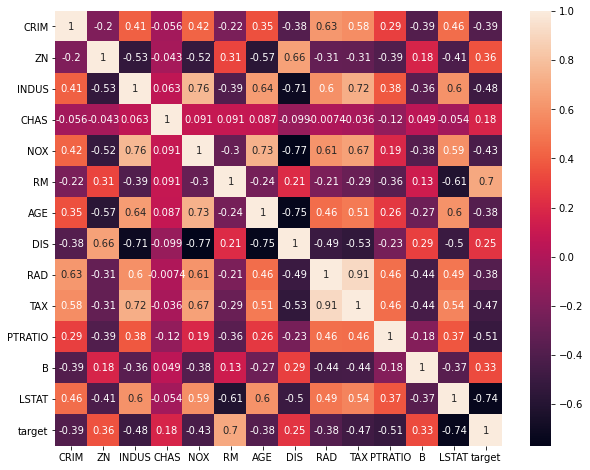

In [16]:
cor = data.corr()
plt.figure(figsize = (10,8))
sns.heatmap(data = cor, annot = True)
plt.show()

The pairwise Pearson Correlation Coefficient might indicate the problem of multicollinearity within a data set. A common rule of thumb is that multicollinearity may be a problem in a data set if r > 0.7 (Dormann et al. 2013). Thus, the correlation matrix reveals that INDUS is correlated with NOX, DIS, TAX. As well as, NOX is correlated with INDUS, DIS, AGE. And AGE is correlated with NOX, DIS.

Scatter plots helps to interpret the correlation coefficient with the target.

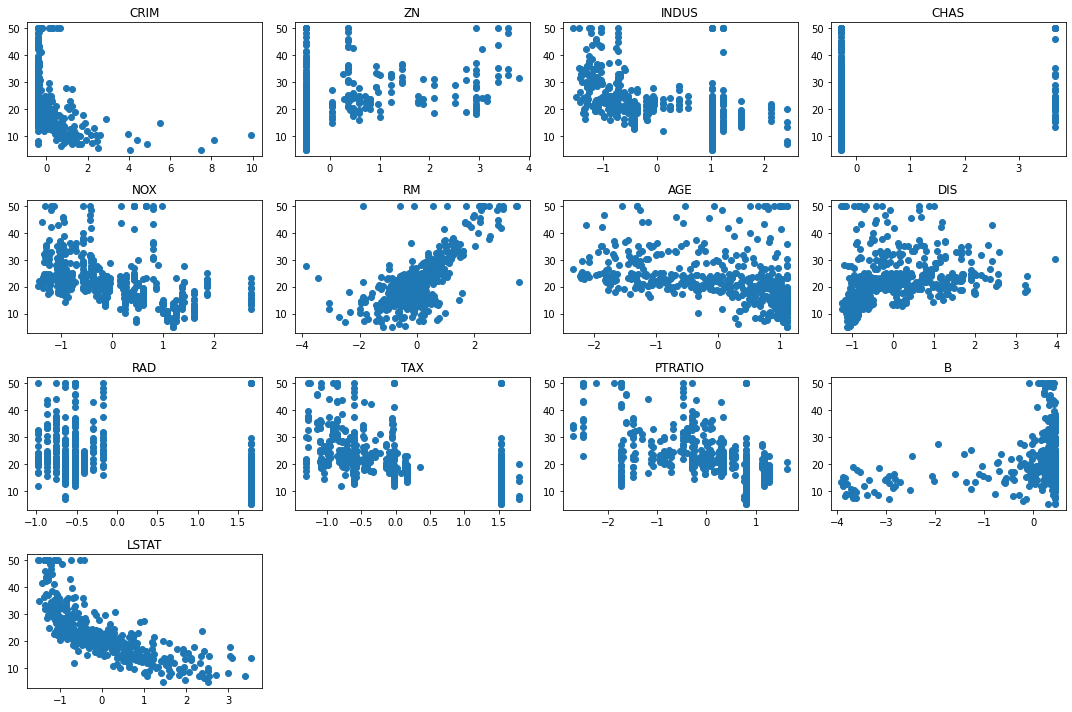

In [36]:
# Scatter plot X vs. y
plt.figure(figsize=(15,10))
for i, name in enumerate(X.columns):
    plt.subplot(4, 4, i+1)
    plt.scatter(X[name],y)
    plt.title(name)
plt.tight_layout()
plt.show()

## Evaluating the multicollinearity

### Variance inflation factor

In [17]:
# To correct use variance_inflation_factor from statsmodels, the X values matrix must contain the constant column to the
# intercept calculation, otherwise VIF will not be reliable. This is because the regression performed to determine VIF uses
# the statsmodels OLS algorithm.

from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = [variance_inflation_factor(X_train_c.values, i) for i in range(X.shape[1]+1)] # +1 because of the intercept
VIF = pd.Series(data = VIF[1:], index = X.columns)
VIF

CRIM       1.713187
ZN         2.465631
INDUS      3.877855
CHAS       1.096674
NOX        4.469150
RM         1.947809
AGE        2.989948
DIS        4.168578
RAD        7.658316
TAX        8.943301
PTRATIO    1.851448
B          1.325121
LSTAT      2.818045
dtype: float64

In [18]:
# 2nd option: VIF using correlation matrix
cor = X.corr()
VIF = np.linalg.inv(cor.values)
VIF = pd.Series(data = VIF.diagonal(), index = X.columns)
VIF

CRIM       1.792192
ZN         2.298758
INDUS      3.991596
CHAS       1.073995
NOX        4.393720
RM         1.933744
AGE        3.100826
DIS        3.955945
RAD        7.484496
TAX        9.008554
PTRATIO    1.799084
B          1.348521
LSTAT      2.941491
dtype: float64

None of the features presented severe multicollinearity since VIF < 10. However, it is observed a moderate VIF value for TAX and RAD. Thus, one of these features could be eliminated from the regression model, since they might represent the same information, and the p-value of individual predictors evaluated. If the parameters of the model and the p-values change by eliminating TAX or RAD, there is an indication of the multicollinearity problem.

### Eigenvectors and eigenvalues

In [19]:
# Using the correlation matrix
eigenvalues, eigenvectors = np.linalg.eig(cor.values)

After extrating the eigenvalues, we look for any value that is close to 0 or is small compared to the others. In this case, 0.063 is the lowest value and its position in eigenvalues is 8. 

In [20]:
eigenvalues

array([6.12684883, 1.43327512, 1.24261667, 0.85757511, 0.83481594,
       0.65740718, 0.53535609, 0.39609731, 0.06350926, 0.27694333,
       0.16930298, 0.18601437, 0.22023782])

Accessing the position 8 of the eigenvector and looking for the largest values:

In [21]:
print(np.sort(eigenvectors[:,8]))

[-0.72023345 -0.0459523  -0.0455671  -0.04363045 -0.03592171 -0.02443168
 -0.02339805  0.00446307  0.01829854  0.03855068  0.08091897  0.25107654
  0.63348972]


In [22]:
eigenvectors[:,8]

array([-0.0459523 ,  0.08091897,  0.25107654, -0.03592171, -0.04363045,
       -0.0455671 ,  0.03855068,  0.01829854,  0.63348972, -0.72023345,
       -0.02339805,  0.00446307, -0.02443168])

The largest values are in the positions 8 and 9, let's find which features are in this position.

In [18]:
features = X.columns
print(features[8], features[9])

RAD TAX


RAD and TAX are the variables responsible for the multicollinearity, a result that is in accordance with the VIF analysis. Now, let's remove TAX and evaluate the parameters of the model.

## Model 2 - removing TAX

In [19]:
X_train1 = X_train_c.drop(columns = ['TAX'])
X_test1 = X_test_c.drop(columns = ['TAX'])

In [20]:
regressor = sm.OLS(y_train, X_train1)
model2 = regressor.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     96.14
Date:                Tue, 04 May 2021   Prob (F-statistic):          1.36e-108
Time:                        09:57:27   Log-Likelihood:                -1197.6
No. Observations:                 404   AIC:                             2421.
Df Residuals:                     391   BIC:                             2473.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4880      0.238     94.471      0.000      22.020      22.956
CRIM          -0.9639      0.301     -3.203      0.001      -1.555      -0.372
ZN             0.4396      0.360      1.221      0.223      -0.269       1.148
INDUS         -0.1765      0.428     -0.413      0.680      -1.017       0.664
CHAS           0.7699      0.243      3.171      0.002       0.293       1.247
NOX           -2.1122      0.491     -4.299      0.000      -3.078      -1.146
RM             3.1828      0.327      9.740      0.000       2.540       3.825
AGE           -0.1728      0.412     -0.419      0.675      -0.984       0.638
DIS           -2.9943      0.478     -6.263      0.000      -3.934      -2.054
RAD            0.9694      0.406      2.387      0.017       0.171       1.768
PTRATIO       -2.0421      0.313     -6.534      0.000      -2.657      -1.428
B              1.1506      0.272      4.229      0.000       0.616       1.686
LSTAT         -3.6015      0.400     -9.008      0.000      -4.387      -2.815
==============================================================================
Omnibus:                      127.817   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              541.969
Skew:                           1.328   Prob(JB):                    2.06e-118
Kurtosis:                       8.014   Cond. No.                         5.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
frame1 = pd.DataFrame(model1.params, index = model1.params.index, columns = ['Model1'])
frame2 = pd.DataFrame(model2.params, index = model2.params.index, columns = ['Model2'])
coefs = pd.concat([frame1, frame2], axis = 1, join = 'outer')
coefs

,Model1,Model2
const,22.485268,22.487990
CRIM,-0.971494,-0.963887
ZN,0.701556,0.439625
INDUS,0.276752,-0.176548
CHAS,0.706532,0.769882
NOX,-1.991430,-2.112249
RM,3.115718,3.182785
AGE,-0.177060,-0.172804
DIS,-3.045771,-2.994344
RAD,2.282785,0.969440


In [22]:
p_values = pd.concat([pd.DataFrame(np.round(model1.pvalues,3), index = model1.pvalues.index, columns = ['Model1']),
                      pd.DataFrame(np.round(model2.pvalues,3), index = model2.pvalues.index, columns = ['Model2'])],
                     axis = 1, join = 'outer')
p_values

,Model1,Model2
const,0.000,0.000
CRIM,0.001,0.001
ZN,0.061,0.223
INDUS,0.549,0.680
CHAS,0.004,0.002
NOX,0.000,0.000
RM,0.000,0.000
AGE,0.666,0.675
DIS,0.000,0.000
RAD,0.001,0.017


Notice how the regression parameters of INDUS, RAD and ZN changed by removing TAX from the model. INDUS even changed the sign of the association from negative to positive. Moreover, p-value of ZN increased considerably strengthening the evidence for the lack of statistical significance to predict the target. This example illustrates the impact of multicollinearity in the interpretability of the model.

In [23]:
# Removing TAX did not effect the RMSE considerably.
RMSE_model2 = np.sqrt(mean_squared_error(y_true = y_test, y_pred = model2.predict(X_test1)))
print('RMSE model2: {}'.format(np.round(RMSE_model2,2)))

RMSE model2: 5.04


## Model 3 - Regression removing ZN, INDUS and AGE

These features are not statistical significant to predict the target (p-values > 0.05).

In [24]:
X_train2 = X_train_c.drop(columns = ['ZN', 'INDUS', 'AGE', 'TAX'])
X_test2 = X_test_c.drop(columns = ['ZN', 'INDUS', 'AGE', 'TAX'])

regressor1 = sm.OLS(y_train, X_train2)
model3 = regressor1.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     128.3
Date:                Tue, 04 May 2021   Prob (F-statistic):          2.70e-111
Time:                        10:05:34   Log-Likelihood:                -1198.6
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     394   BIC:                             2457.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4843      0.238     94.610      0.000      22.017      22.952
CRIM          -0.9339      0.299     -3.120      0.002      -1.522      -0.345
CHAS           0.7621      0.242      3.152      0.002       0.287       1.238
NOX           -2.2790      0.444     -5.134      0.000      -3.152      -1.406
RM             3.2131      0.313     10.267      0.000       2.598       3.828
DIS           -2.5994      0.379     -6.862      0.000      -3.344      -1.855
RAD            1.0399      0.396      2.628      0.009       0.262       1.818
PTRATIO       -2.2117      0.288     -7.684      0.000      -2.778      -1.646
B              1.1529      0.271      4.258      0.000       0.621       1.685
LSTAT         -3.6460      0.380     -9.595      0.000      -4.393      -2.899
==============================================================================
Omnibus:                      126.823   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              534.490
Skew:                           1.319   Prob(JB):                    8.65e-117
Kurtosis:                       7.979   Cond. No.                         4.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
frame3 = pd.DataFrame(model3.params, index = model3.params.index, columns = ['Model3'])
coefs = pd.concat([coefs, frame3], axis = 1, join = 'outer')
coefs

,Model1,Model2,Model3
const,22.485268,22.487990,22.484338
CRIM,-0.971494,-0.963887,-0.933879
ZN,0.701556,0.439625,NaN
INDUS,0.276752,-0.176548,NaN
CHAS,0.706532,0.769882,0.762135
NOX,-1.991430,-2.112249,-2.278961
RM,3.115718,3.182785,3.213078
AGE,-0.177060,-0.172804,NaN
DIS,-3.045771,-2.994344,-2.599441
RAD,2.282785,0.969440,1.039937


Now, the model is only composed by the features with statistical significance to predict the target. Moreover, based on the VIF analysis below, a model with these features is free of multicollinearity.

In [33]:
cor = X_train2.drop(columns='const').corr()
VIF = np.linalg.inv(cor.values)
VIF = pd.Series(data = VIF.diagonal(), index = X_train2.columns[1:])
VIF

CRIM       1.699502
CHAS       1.078715
NOX        3.621973
RM         1.779177
DIS        2.619200
RAD        2.715091
PTRATIO    1.564327
B          1.313838
LSTAT      2.550872
dtype: float64

In [28]:
RMSE_model3 = np.sqrt(mean_squared_error(y_true = y_test, y_pred = model3.predict(X_test2)))
print('RMSE model3: {}'.format(np.round(RMSE_model3,2)))

RMSE model3: 5.14


## Identifying the most important features in regression models

The steps to investigate the multicollinearity presented above get tedious when the number of features increases. In this case, a method of feature selection can be used to select the best features to predict the target, evaluate the VIF of the selected features and train the model. Regularization is another method that can be used to decrease the impact of irrelevant features. Another interesting method, that I will show here, is to estimate the impact of each feature in the coefficient of determination (R^2). 

#### Estimate the impact of each feature in R-squared.

A model will be trained using each of the features.

In [51]:
linmodel = LinearRegression()

def r_squared(X, y):
    return r2_score(y_true = y, y_pred = linmodel.fit(X,y).predict(X))

# Generate the impact of each variable
r2_impact = list()

for i in range(X_train.shape[1]):
    features = [j for j in range(X_train.shape[1]) if j != i]
    r2_impact.append(((r_squared(X_train,y_train) - r_squared(X_train.values[:,features], y_train)), X_train.columns[i]))

for i, name in sorted(r2_impact, reverse= True):
    print('%s %6.3f' %  (name, i))

RM  0.058
LSTAT  0.053
DIS  0.026
PTRATIO  0.026
B  0.011
NOX  0.011
RAD  0.008
CRIM  0.007
CHAS  0.005
TAX  0.004
ZN  0.002
INDUS  0.000
AGE  0.000


The last 4 features are TAX, responsable for the multicollinearity, and ZN, INDUS and AGE are the ones that were statistically irrelevant to predict the target. See how the analysis made so far complement each other, that is why it is important to explore and investigate the data as much as possible in order to make decisions supported by evidences.  

## Interpreting the model parameters

Standardized parameters can not be interpreted as the mean variation in y as a result of 1 unit change in Xi. Standardization must be removed in order to interpret the model parameters as usual.

In [58]:
# Removing standardization from the parameters
std = pd.Series(scaler.scale_, index = model1.params[1:].index)
std = std.filter(items = model3.params[1:].index)
parameters = model3.params[1:] / std
parameters.sort_values(ascending=False)

RM          4.577540
CHAS        3.003570
RAD         0.119552
B           0.012641
CRIM       -0.108679
LSTAT      -0.511069
PTRATIO    -1.022588
DIS        -1.235694
NOX       -19.686415
dtype: float64

In [64]:
# Removing the standardization from the intercept
mean = pd.Series(scaler.mean_, index = model1.params[1:].index)
mean = mean.filter(items = model3.params[1:].index)
print('const', np.round(model3.params[0] - np.sum(model3.params[1:] * (mean / std)),3))

const 29.199


The model:

target = 29.20 + 4.58*RM + 3*CHAS + 0.12*RAD + 0.01*B - 0.11*CRIM - 0.51*LSTAT - 1.02*PTRATIO - 1.24*DIS - 19.69NOX

A change of 4.58 on average is expected in target when RM changes in 1 unit, while a change of -19.69 on average occurs when NOX varies 1 unit. In this case, RM, CHAS, RAD contributes to increase the price of the house, while CRIM, LSTAT, PTRATIO, DIS and NOX decreases the price of the house.